# Intro to Bayesian Statistics Lab

Complete the following set of exercises to solidify your knowledge of Bayesian statistics and Bayesian data analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def bayes_rule(priors, likelihoods):
    marg = sum(np.multiply(priors, likelihoods))
    post = np.divide(np.multiply(priors, likelihoods), marg)
    return post

## 1. Cookie Problem

Suppose we have two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. You randomly pick one cookie out of one of the bowls, and it is vanilla. Use Bayes Theorem to calculate the probability that the vanilla cookie you picked came from Bowl 1?

In [14]:
'''
prior probability
Probability to choose either one of the bowl 0,5
B1 : bowl1, B2 : bowl2 P(B1) = P(B2) = 0,5
'''

p_v_knowing_b1 = 3/4
p_b1 = 0.5
p_v = 0.5*(3/4)+0.5*(1/2)

p_b1_knowing_v = p_v_knowing_b1 * p_b1 / p_v
print('Probability of vanilla cookie coming from Bowl 1:', p_b1_knowing_v)

Probability of vanilla cookie coming from Bowl 1: 0.6


In [5]:
#Verif
priors = [0.5, 0.5]
likelihoods = [0.75, 0.5]

posteriors = bayes_rule(priors, likelihoods)

print('Probability of vanilla cookie coming from Bowl 1:', posteriors[0])

Probability of vanilla cookie coming from Bowl 1: 0.6


What is the probability that it came from Bowl 2?

In [15]:
p_v_knowing_b2 = 0.5
p_b2 = 0.5
p_v = 0.5*(3/4)+0.5*(1/2)

p_b2_knowing_v = p_v_knowing_b2 * p_b2 / p_v
print('Probability of vanilla cookie coming from Bowl 2:', p_b2_knowing_v)

Probability of vanilla cookie coming from Bowl 2: 0.4


In [7]:
#Verif
print('Probability of vanilla cookie coming from Bowl 2:', posteriors[1])

Probability of vanilla cookie coming from Bowl 2: 0.4


What if the cookie you had picked was chocolate? What are the probabilities that the chocolate cookie came from Bowl 1 and Bowl 2 respectively?

In [16]:
#Proba that a choco cookie came from B1
p_b1_knowing_c = ((1/4) * 0.5) / (0.5*(1/4)+0.5*(1/2))
print('Probability of chocolate cookie coming from Bowl 1:', p_b1_knowing_c)

#Proba that a choco cookie came from B2
p_b2_knowing_c = ((1/2) * 0.5) / (0.5*(1/4)+0.5*(1/2))
print('Probability of chocolate cookie coming from Bowl 2:', p_b2_knowing_c)

Probability of chocolate cookie coming from Bowl 1: 0.3333333333333333
Probability of chocolate cookie coming from Bowl 2: 0.6666666666666666


In [10]:
#Verif
likelihoods = [0.25, 0.5]

posteriors = bayes_rule(priors, likelihoods)

print('Probability of chocolate cookie coming from Bowl 1:', posteriors[0])
print('Probability of chocolate cookie coming from Bowl 2:', posteriors[1])

Probability of chocolate cookie coming from Bowl 1: 0.3333333333333333
Probability of chocolate cookie coming from Bowl 2: 0.6666666666666666


## 2. Candy Problem

Suppose you have two bags of candies:

- In Bag 1, the mix of colors is:
    - Brown - 30%
    - Yellow - 20%
    - Red - 20%
    - Green - 10%
    - Orange - 10%
    - Tan - 10%
    
- In Bag 2, the mix of colors is:
    - Blue - 24%
    - Green - 20%
    - Orange - 16%
    - Yellow - 14%
    - Red - 13%
    - Brown - 13%
    
Not knowing which bag is which, you randomly draw one candy from each bag. One is yellow and one is green. What is the probability that the yellow one came from the Bag 1?

*Hint: For the likelihoods, you will need to multiply the probabilities of drawing yellow from one bag and green from the other bag and vice versa.*

In [18]:
#Proba of getting a yellow candy from bag1 knowing that we picked a green one in bag2

p_yb1_knowing_gb2 = (0.2 * (0.5*0.2)) / (0.5*0.2*0.2+0.5*0.14*0.1)

print('Probability of yellow candy coming from Bag 1:', p_yb1_knowing_gb2)

Probability of yellow candy coming from Bag 1: 0.7407407407407408


In [17]:
#Verif
priors = [0.5, 0.5]
likelihoods = [(0.2 * 0.2), (0.14 * 0.1)]

posteriors = bayes_rule(priors, likelihoods)

print('Probability of yellow candy coming from Bag 1:', posteriors[0])

Probability of yellow candy coming from Bag 1: 0.7407407407407408


What is the probability that the yellow candy came from Bag 2?

In [21]:
#Proba of getting a yellow candy from bag2 knowing that we picked a green one in bag1

p_yb2_knowing_gb1 = (0.1 * (0.5*0.14)) / (0.5*0.2*0.2+0.5*0.14*0.1)

print('Probability of yellow candy coming from Bag 2:', p_yb2_knowing_gb1)

Probability of yellow candy coming from Bag 1: 0.25925925925925924


In [20]:
#Verif
print('Probability of yellow candy coming from Bag 2:', posteriors[1])

Probability of yellow candy coming from Bag 1: 0.25925925925925924


What are the probabilities that the green one came from Bag 1 and Bag 2 respectively?

In [23]:
#Verif
priors = [0.5, 0.5]
likelihoods = [(0.14 * 0.1), (0.2 * 0.2)]

posteriors = bayes_rule(priors, likelihoods)

print('Probability of green candy coming from Bag 1:', posteriors[0])
print('Probability of green candy coming from Bag 2:', posteriors[1])

Probability of green candy coming from Bag 1: 0.25925925925925924
Probability of green candy coming from Bag 2: 0.7407407407407408


## 3. Monty Hall Problem

Suppose you are a contestant on the popular game show *Let's Make a Deal*. The host of the show (Monty Hall) presents you with three doors - Door A, Door B, and Door C. He tells you that there is a sports car behind one of them and if you choose the correct one, you win the car!

You select Door A, but then Monty makes things a little more interesting. He opens Door B to reveal that there is no sports car behind it and asks you if you would like to stick with your choice of Door A or switch your choice to Door C. Given this new information, what are the probabilities of you winning the car if you stick with Door A versus if you switch to Door C?

In [25]:
priors = [1/3, 1/3, 1/3]
likelihoods = [1/2, 0, 1]

posteriors = bayes_rule(priors, likelihoods)

print('Probability of winning if you stick with Door A:', posteriors[0])
print('Probability of winning if you switch to Door C:', posteriors[2])

Probability of winning if you stick with Door A: 0.3333333333333333
Probability of winning if you switch to Door C: 0.6666666666666666


## 4. Bayesian Analysis 

Suppose you work for a landscaping company, and they want to advertise their service online. They create an ad and sit back waiting for the money to roll in. On the first day, the ad sends 100 visitors to the site and 14 of them sign up for landscaping services. Create a generative model to come up with the posterior distribution and produce a visualization of what the posterior distribution would look like given the observed data.

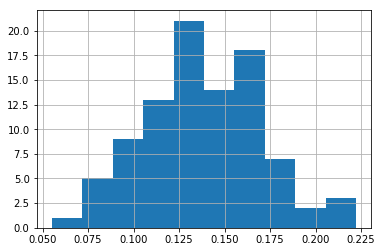

In [40]:
observed = 14

def generative_model(param):
    result = np.random.binomial(100, param) #100 = moyenne, param = écart-type
    return result

sim_data = list()

n_draws=10000
prior = pd.Series(np.random.uniform(0, 1, size=n_draws))

for p in prior:
    sim_data.append(generative_model(p))

posterior = prior[list(map(lambda x: x == observed, sim_data))]
posterior.hist()

Produce a set of descriptive statistics for the posterior distribution.

In [41]:
posterior.describe()

count    93.000000
mean      0.138321
std       0.032122
min       0.055076
25%       0.117848
50%       0.137134
75%       0.161944
max       0.222338
dtype: float64

What is the 90% credible interval range?

In [42]:
print(posterior.quantile(.025), '|', posterior.quantile(.975))

0.080988653181203 | 0.2109010013957148


What is the Maximum Likelihood Estimate?

In [44]:
rounded = posterior.round(2)
mode = rounded.mode()[0]
probability = list(rounded).count(mode)/len(rounded)
print('Maximum Likelihood Estimate: ', mode, '|',probability)

Maximum Likelihood Estimate:  0.16 | 0.15053763440860216


In [ ]:
'''This tells us that given the data we have thus far, 
it is most likely that 16% of the visitors will make a purchase.'''